In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/heart/heart.csv')

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional but helps for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


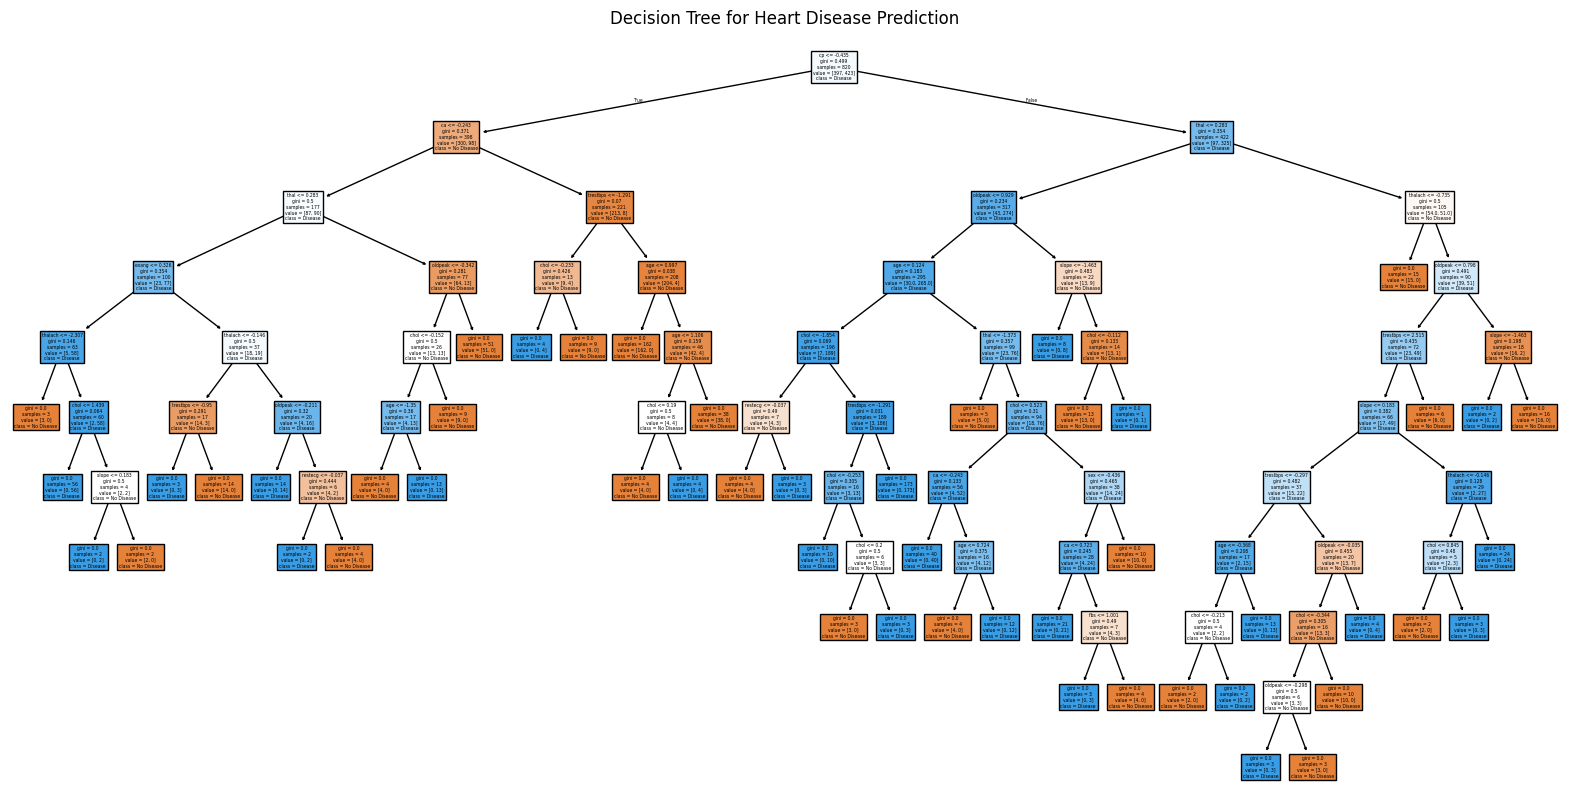

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=df.columns[:-1], class_names=["No Disease", "Disease"])
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()


In [3]:
from sklearn.metrics import accuracy_score

# Try different tree depths and store performance
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Depth: {depth}  |  Train Accuracy: {train_acc:.2f}  |  Test Accuracy: {test_acc:.2f}")


Depth: 1  |  Train Accuracy: 0.76  |  Test Accuracy: 0.75
Depth: 2  |  Train Accuracy: 0.77  |  Test Accuracy: 0.68
Depth: 3  |  Train Accuracy: 0.85  |  Test Accuracy: 0.78
Depth: 4  |  Train Accuracy: 0.88  |  Test Accuracy: 0.80
Depth: 5  |  Train Accuracy: 0.93  |  Test Accuracy: 0.84
Depth: 6  |  Train Accuracy: 0.95  |  Test Accuracy: 0.88
Depth: 7  |  Train Accuracy: 0.97  |  Test Accuracy: 0.92
Depth: 8  |  Train Accuracy: 0.99  |  Test Accuracy: 0.98
Depth: 9  |  Train Accuracy: 1.00  |  Test Accuracy: 0.98
Depth: 10  |  Train Accuracy: 1.00  |  Test Accuracy: 0.99


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate accuracy
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Random Forest  |  Train Accuracy: {rf_train_acc:.2f}  |  Test Accuracy: {rf_test_acc:.2f}")


Random Forest  |  Train Accuracy: 1.00  |  Test Accuracy: 0.99


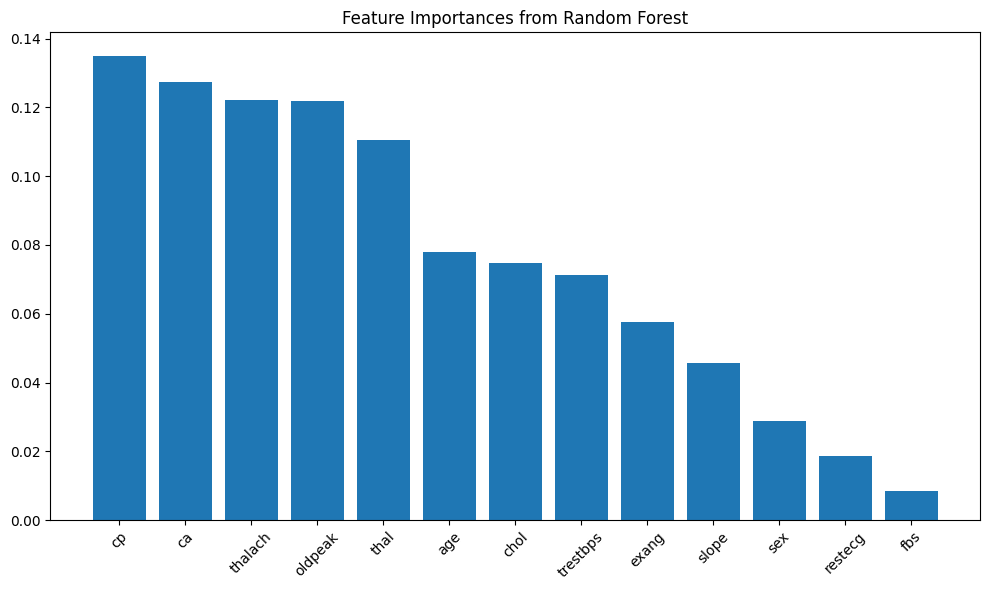

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest
importances = rf_model.feature_importances_
features = df.columns[:-1]  # all columns except 'target'

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f} | Std Dev: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 1.00 | Std Dev: 0.01
